In [1]:
!pip install tfc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 439 kB 5.3 MB/s 
  Created wheel for yattag: filename=yattag-1.14.0-py3-none-any.whl size=15659 sha256=20befe758df19590204f75af3dc6b698955c87fa9c229f879fe94cef6afc4091
  Stored in directory: /root/.cache/pip/wheels/4d/32/61/f205e276a280e24c3fca996bd956781b2a0fbad498161e53f4
Successfully built yattag
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.1.4 requires typi

In [2]:
from tfc import mtfc
from tfc import utfc
import jax.numpy as np # Imported so we can access pi
from tfc.utils import MakePlot # Imported so we can plot the points at the end

# ***Univariate***

---



In [ ]:
myTFC = utfc(3,2,3,x0=3,xf=7)

In [ ]:
l1 = np.array([2, 3, 0])
l2 = np.array([1, 1, 1])
print(np.dot(l1, l2))

5


In [ ]:
x = myTFC.x
H = myTFC.H
print(H(x))

[[ 1. -1.]
 [-1. -0.]
 [ 1.  1.]]


# ***Multivariate***



---



Number of points: 240
Basis function removal matrix: 
[[ 0  1]
 [ 0 -1]
 [ 0  2]]


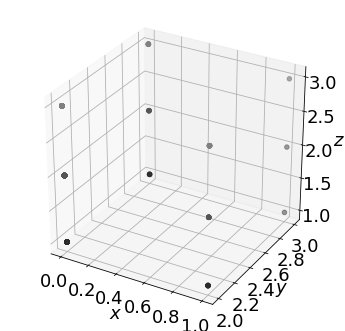

In [ ]:
# This line is added for Python notebooks but is not necessary in a regular Python script.
%matplotlib inline

N = [10,8,3] # Number of points per dimension
nC = [2,1,[0,2]] # Basis functions to remove per dimension
m = 5 # Degree of basis function expansion
x0 = [0,2,1] # Start of the domain for each dimension
xf = [1,np.pi,3] # End of the domain for each dimension

myTfc = mtfc(N,nC,m,dim=3,x0=x0,xf=xf)
x = myTfc.x

# Print out satistics
print("Number of points: "+str(myTfc.x[0].shape[0]))
print("Basis function removal matrix: \n"+str(myTfc.nC))

# Show points
p = MakePlot(r'$x$',r'$y$',zlabs=r'$z$')
p.ax[0].scatter(*x,color=[str(val/6.) for val in x[2]])
p.PartScreen(5,5)
p.show()

In [ ]:
print(myTfc.x[0].shape)

(240,)


# ***Solving PDE***

---



In [3]:
# Create the multivariate TFC class
N = [25,25] # Number of points in the domain
m = 25 # Degree of basis function expansion
nC = [2,[1,-1]] # Indicates which basis functions need to be removed from the expansion
x0 = [0,0] # Start of the domain for each dimension
xf = [1,2.*np.pi] # End of the domain in each dimension

myTfc = mtfc(N,nC,m,x0=x0,xf=xf)

# Create the analytical solution
realSoln = lambda x,y: x**2*np.cos(y)

In [4]:
x = myTfc.x # Collocation points from the TFC class

# Get the basis functions from the TFC class
H = myTfc.H

# Create the constrained expression
g = lambda xi,*x: np.dot(H(*x),xi)
u1 = lambda xi,*x: g(xi,*x)-(1.-x[0])*g(xi,np.zeros_like(x[0]),x[1])+x[0]*(np.cos(x[1])-g(xi,np.ones_like(x[0]),x[1]))
u = lambda xi,*x: u1(xi,*x)+x[1]/(2.*np.pi)*(u1(xi,x[0],2.*np.pi*np.ones_like(x[1]))-u1(xi,x[0],np.zeros_like(x[1])))

In [5]:
from tfc.utils import egrad, NLLS

# Create the residual
ux = egrad(u,1)
uxx = egrad(ux,1)
uy = egrad(u,2)
L = lambda xi: uxx(xi,*x)+ux(xi,*x)*uy(xi,*x)-2.*np.cos(x[1])+2.*x[0]**3*np.sin(x[1])*np.cos(x[1])

# Minimize the residual using least-squares
xi0 = np.zeros(H(*x).shape[1])
# xi,_,time = NLLS(xi0,L,timer=True)